# 抓取以太幣(ethereum)

In [1]:
import requests
import pandas as pd

In [7]:
# CoinGecko(幣虎), https://www.coingecko.com/zh-tw
# YouTube: https://www.youtube.com/watch?v=wZ48Gjb-k2U
url = "https://www.coingecko.com/price_charts/279/usd/max.json"
url_headers = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.119 Safari/537.36"}
data = requests.get(url, headers = url_headers)
data

<Response [200]>

In [8]:
# 資料為json格式
prices = data.json()['stats']
values = data.json()['total_volumes']
# 轉成dataframe
df = pd.DataFrame(prices)
dfV = pd.DataFrame(values)
# 合併
df['volume'] = dfV[1]  # 成交量
df.columns = ['datetime','price', 'volume']  # 給column name
df.head(5)

,datetime,price,volume
0,1438905600000,2.831620,9.062200e+04
1,1438992000000,1.330750,3.680700e+05
2,1439164800000,0.687586,4.004641e+05
3,1439251200000,1.067379,1.518998e+06
4,1439337600000,1.256613,2.073893e+06


In [9]:
# 將datetime欄位轉成日期格式, 資料取樣為天
df['datetime'] = pd.to_datetime(df['datetime'], unit='ms')
# 轉成時間序列
df.index = df['datetime']
df.head()

,datetime,price,volume
datetime,,,
2015-08-07,2015-08-07,2.831620,9.062200e+04
2015-08-08,2015-08-08,1.330750,3.680700e+05
2015-08-10,2015-08-10,0.687586,4.004641e+05
2015-08-11,2015-08-11,1.067379,1.518998e+06
2015-08-12,2015-08-12,1.256613,2.073893e+06


Populating the interactive namespace from numpy and matplotlib


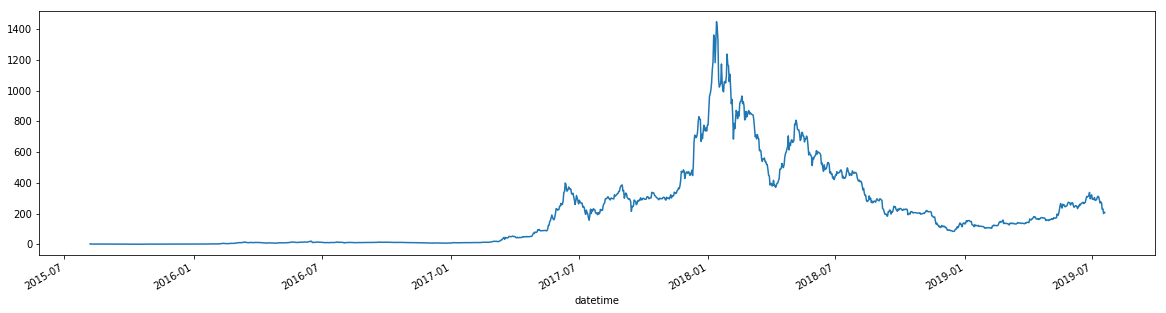

In [10]:
# 畫圖:價格
%pylab inline
df['price'].plot(kind = 'line', figsize=[20, 5])

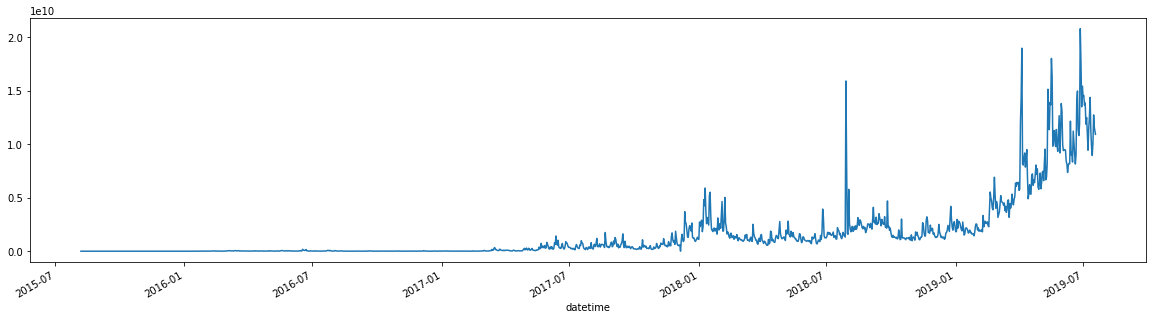

In [11]:
# 畫圖:成交量
df['volume'].plot(kind = 'line', figsize=[20, 5])

## MA技術指標

均線是移動平均線的簡稱，英文稱為(Moving Average, MA)，簡單的說就是過一段時間內的平均值。  
接下來增加一個5日均線及10日均線

In [12]:
df['ma5'] = df['price'].rolling(window = 5).mean()
df['ma10'] = df['price'].rolling(window = 10).mean()

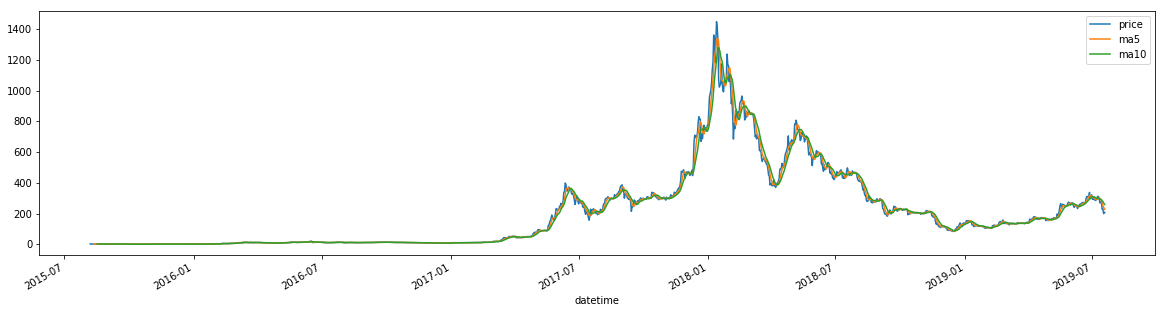

In [13]:
df[['price','ma5','ma10']].plot(kind = 'line', figsize=[20, 5])

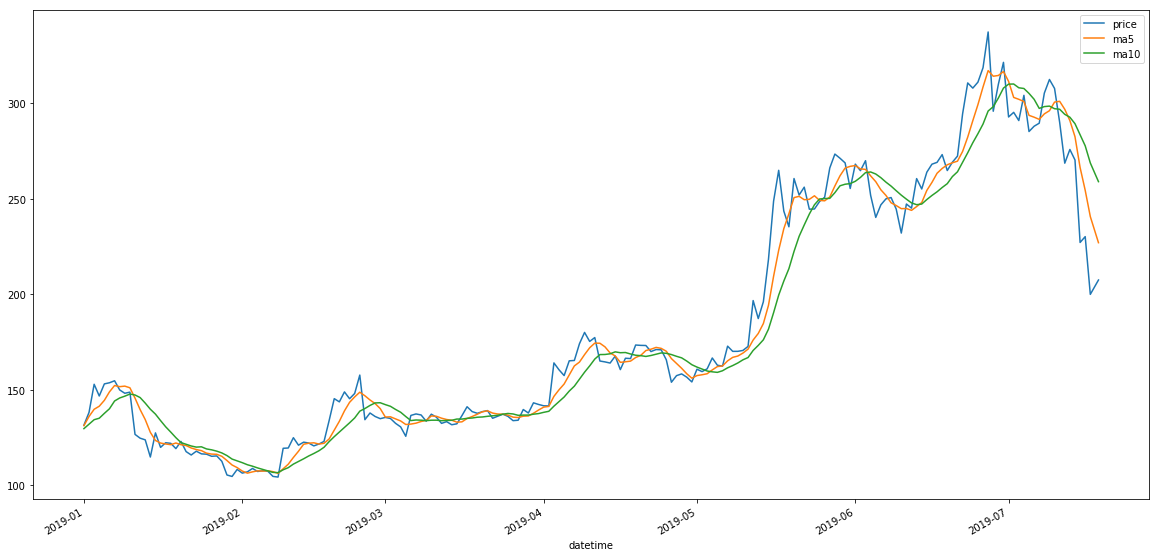

In [14]:
# show 2019
df2 = df[df['datetime'] >= '2019-01-01']
df2[['price','ma5','ma10']].plot(kind = 'line', figsize=[20, 10])

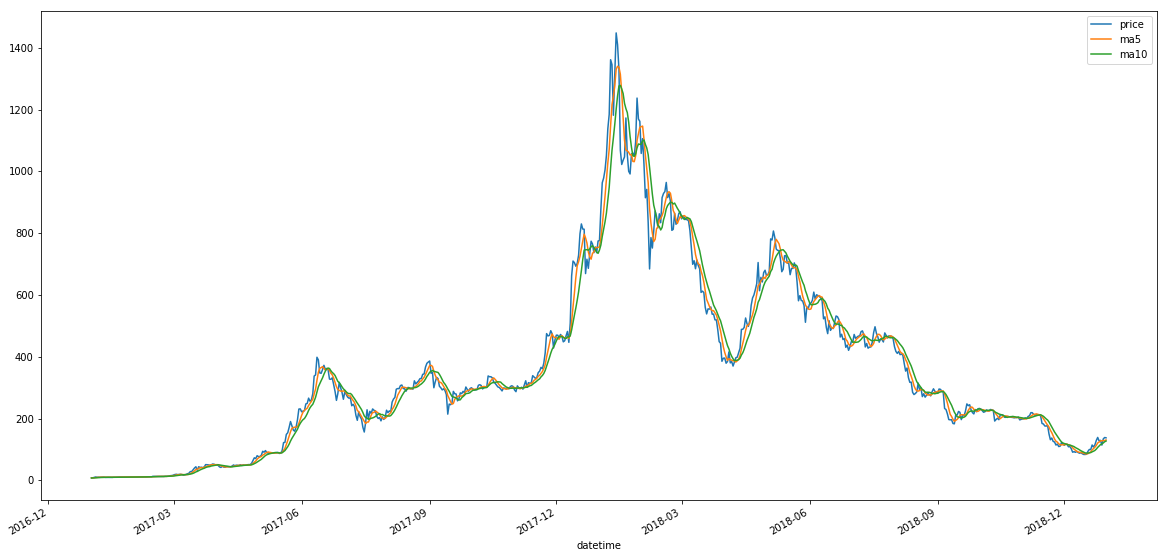

In [15]:
# show 2017~2018
df3 = df['2017-01-01':'2018-12-31']
df3[['price','ma5','ma10']].plot(kind = 'line', figsize=[20, 10])

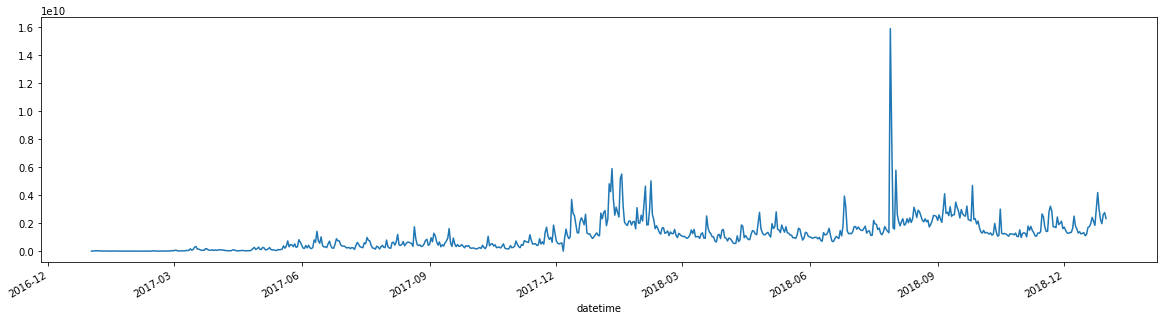

In [20]:
# 成交量
df3['volume'].plot(kind = 'line', figsize=[20, 5])

## 布林通道
參考網址:https://www.cmoney.tw/notes/note-detail.aspx?nid=17738

布林通道 是結合 均線 和 標準差 的概念
以 20MA 為中心 上下各2個標準差 為範圍的軌道操作方式
布林通道 又稱 布林格帶狀(Bollinger Bands，BBands) 或 保力加通道，

是由 約翰．布林格(John Bollinger) 所提出的概念。

 

 

原始設定為:

帶狀上限 = 帶狀中心線 + 2個標準差

帶狀中心線 = 20期移動平均線(即20MA)

帶狀下限 = 帶狀中心線 - 2個標準差

 

布林格 結合了 移動平均線 和 統計學標準差 的概念。

其中基本的型態，就是由 3條軌道線組成的帶狀通道。

中軌 = 平均成本

上軌 = 股價的壓力線

下軌 = 股價的支撐線

In [17]:
df['ma20'] = df['price'].rolling(window = 20).mean()
df['std20'] = df['price'].rolling(window = 20).std()
df['BB+'] = df['ma20'] + df['price'].rolling(window = 20).std()*2
df['BB-'] = df['ma20'] - df['price'].rolling(window = 20).std()*2

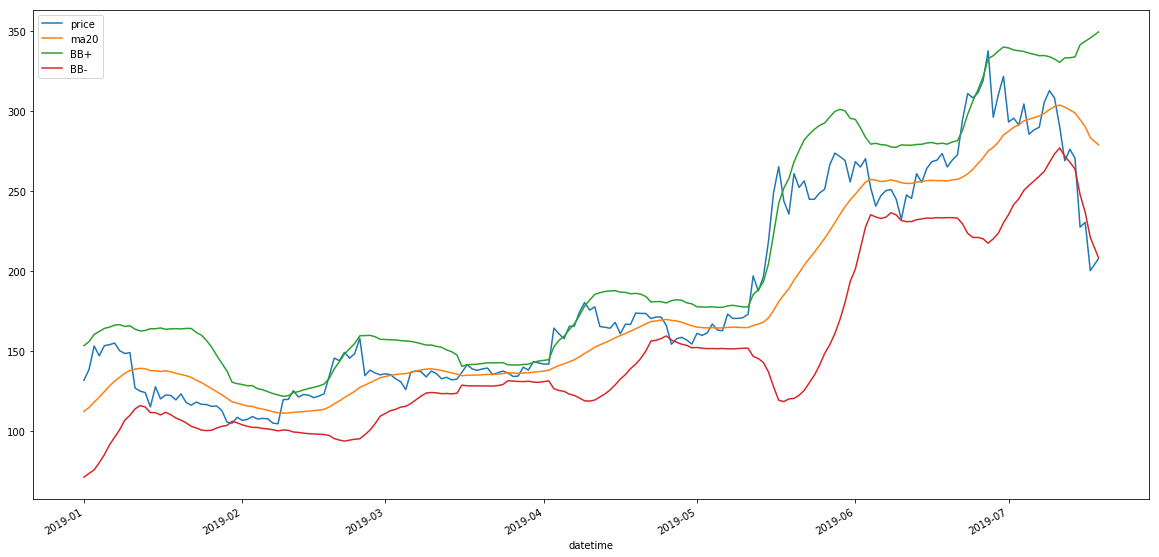

In [18]:
df4 = df[df['datetime'] >= '2019-01-01']
df4[['price','ma20','BB+', 'BB-']].plot(kind = 'line', figsize=[20, 10])

# 黃金交叉與死亡交叉：

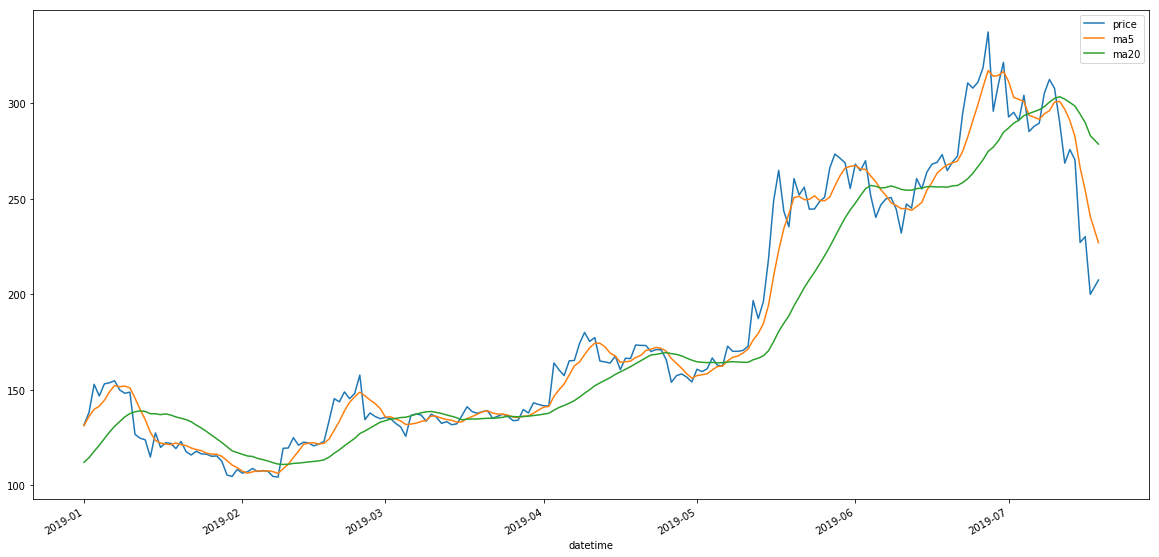

In [19]:
df5 = df[df['datetime'] >= '2019-01-01']
df5[['price','ma5','ma20']].plot(kind = 'line', figsize=[20, 10])